In [ ]:
#################################
######### R kernel ##############
#################################
# install the required packages #
#################################
install.packages("rjson", dependencies = TRUE) # install this package if you want to read json files
install.packages("data.table", dependencies = TRUE) # install this package if you are working with large data sets (extension of data.frame)
install.packages("bipartite", dependencies = TRUE) # install this package for analyzing/visualising bipartite networks
install.packages("network", dependencies = TRUE)
install.packages("statnet", dependencies = TRUE)

In [1]:
#########################################################################
############################# R kernel ##################################
#########################################################################
# remove everything in our workspace so we can start with a clean state #
#########################################################################
rm(list = ls())

In [2]:
#############################
######## R kernel ###########
#############################
# set our working directory #
#############################
setwd("~/")

In [3]:
##############################
######### R kernel ###########
##############################
# load the required packages #
##############################
library("rjson") # load the rjson package
library("data.table") # load the data.table package
library("bipartite") # load the bipartite package
library("network") # load the network package
library("statnet") # load the statnet package

Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.4-5
Loading required package: sna
Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following object is masked from ‘package:base’:

    order

Loading required package: network
network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation informati

In [4]:
###########################################################
######################## R kernel #########################
###########################################################
# download one ecological network from www.web-of-life.es #
###########################################################
networkName <- 'M_SD_010'
speciesName <- 'yes'
url <- paste('http://www.web-of-life.es/download/',networkName,'_',speciesName,'.csv',sep='')
network_adjacency_matrix <- as.matrix(read.csv(file=url,sep=",", header=TRUE, row.names=1, check.names="FALSE"))
# print the network_adjacency_matrix
network_adjacency_matrix

,Tangara gyrola,Ramphocelus carbo,Tangara mexicana,Euphonia violacea,Chlorophanes spiza,Thraupis palmarum,Tachyphonus rufus,Dacnis cayana,Thraupis episcopus,Cyanerpes caeruleus,Tangara guttata,Cyanerpes cyaneus,Coereba flaveola,Tachyphonus luctuosus
Miconia sp1 M_SD_010,127,153,74,17,80,35,23,52,17,11,40,20,12,5
Cecropia peltata,72,17,31,0,5,18,18,3,26,0,3,0,4,0
Trema micrantha,39,1,11,29,34,1,3,13,2,27,12,11,3,0
Ficus clusiifolia,48,0,17,7,12,11,3,1,8,3,2,5,8,0
Didymopanax morototoni,13,5,1,0,2,49,0,4,33,0,0,0,1,0
Alchornea glandulosa,13,0,0,0,13,14,0,16,1,11,9,0,0,0
Protium heptaphyllum,6,2,13,5,4,12,9,4,9,0,0,0,0,1
Unidentified sp2 M_SD_010,2,0,10,29,6,0,3,2,0,3,0,0,1,0
Aechmaea nudicaulis,0,0,0,38,0,0,7,0,0,0,0,0,0,0
Gravisia aquilega,0,14,0,0,0,0,29,0,0,0,0,0,0,0


In [5]:
#############################################################
######################## R kernel ###########################
#############################################################
# print the list of pairwise interactions from that network #
#############################################################
network_list_edges <- melt(data=network_adjacency_matrix, value.name="interaction", varnames=c("plant","seed_disperser"))
# remove pairs of species that do not interact (interaction = 0)
links <- subset(network_list_edges, interaction > 0)
links

,plant,seed_disperser,interaction
1,Miconia sp1 M_SD_010,Tangara gyrola,127
2,Cecropia peltata,Tangara gyrola,72
3,Trema micrantha,Tangara gyrola,39
4,Ficus clusiifolia,Tangara gyrola,48
5,Didymopanax morototoni,Tangara gyrola,13
6,Alchornea glandulosa,Tangara gyrola,13
7,Protium heptaphyllum,Tangara gyrola,6
8,Unidentified sp2 M_SD_010,Tangara gyrola,2
11,Clidemia sp1 M_SD_010,Tangara gyrola,2
13,Hieronyma caribaea,Tangara gyrola,14


In [6]:
###########################################################################
########################### R kernel ######################################
###########################################################################
# add column to the list of interacting species indicating the network id #
###########################################################################
links["network_id"] <- networkName
links

,plant,seed_disperser,interaction,network_id
1,Miconia sp1 M_SD_010,Tangara gyrola,127,M_SD_010
2,Cecropia peltata,Tangara gyrola,72,M_SD_010
3,Trema micrantha,Tangara gyrola,39,M_SD_010
4,Ficus clusiifolia,Tangara gyrola,48,M_SD_010
5,Didymopanax morototoni,Tangara gyrola,13,M_SD_010
6,Alchornea glandulosa,Tangara gyrola,13,M_SD_010
7,Protium heptaphyllum,Tangara gyrola,6,M_SD_010
8,Unidentified sp2 M_SD_010,Tangara gyrola,2,M_SD_010
11,Clidemia sp1 M_SD_010,Tangara gyrola,2,M_SD_010
13,Hieronyma caribaea,Tangara gyrola,14,M_SD_010


In [7]:
################################################
################# R kernel #####################
################################################
# compute the nestedness (NODF) of the network #
################################################
nestedness <- nested(network_adjacency_matrix, method="NODF")/100
nestedness

NODF 
0.4213389

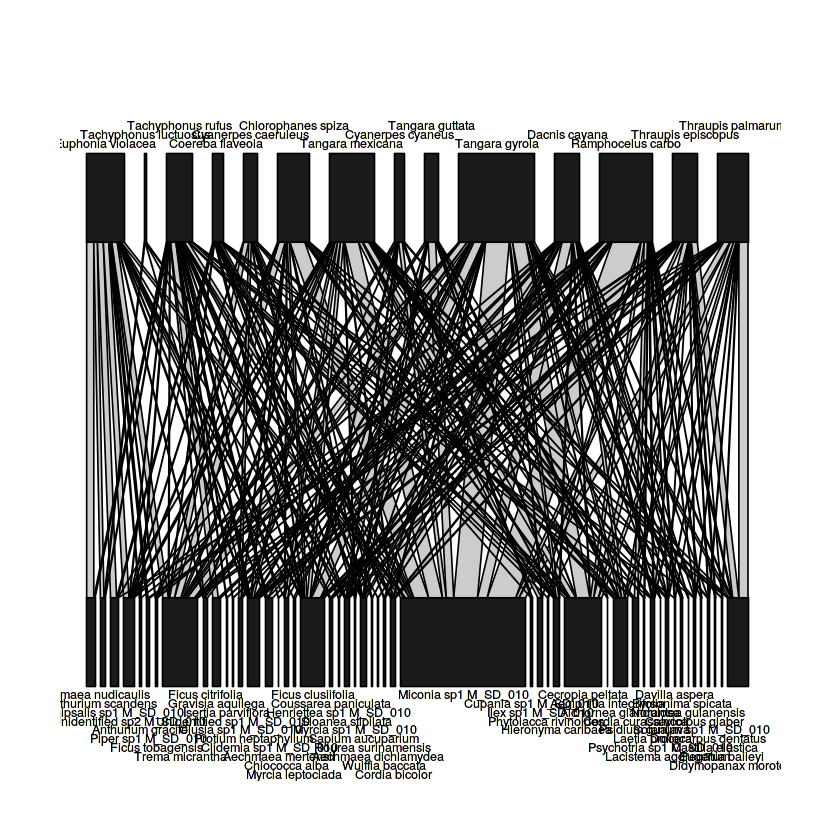

In [8]:
####################
##### R kernel #####
####################
# plot the network #
####################
plotweb(network_adjacency_matrix)

In [9]:
#########################################################
#################### R kernel ###########################
#########################################################
# download all networks for a specific interaction type #
#########################################################
# what is the type of interaction you are interested in?
    # mutualistic interactions
        # '3' (plant-ant)
        # '5' (plant-pollinator)
        # '6' (plant-seed_disperser)
    # antagonistic interactions
        # '8' (host-parasite)
        # '10' (plant-herbivore)

type_id <- '8' # host-parasite
json_file <- paste('http://www.web-of-life.es/networkslist.php?type=',type_id,'&data=All',sep='')
json_networks <- fromJSON(paste(readLines(json_file), collapse=""))
# would you like to include the names of the species? ('yes' or 'no')
speciesName <- 'yes'
# downloading the networks
for(i in 1:length(json_networks)){
    # identifying the network
    networkName <- json_networks[[i]]$networkName
    print(networkName)
    # building the URL
    url <- paste('http://www.web-of-life.es/download/',networkName,'_',speciesName,'.csv',sep='')
    # downloading the network from www.web-of-life.es
    data <- fread(url)
    # storing the network as a data table
    assign(networkName,data)
}

Warning message in readLines(json_file):
“incomplete final line found on 'http://www.web-of-life.es/networkslist.php?type=8&data=All'”

[1] "A_HP_001"
[1] "A_HP_002"
[1] "A_HP_003"
[1] "A_HP_004"
[1] "A_HP_005"
[1] "A_HP_006"
[1] "A_HP_007"
[1] "A_HP_008"
[1] "A_HP_009"
[1] "A_HP_010"
[1] "A_HP_011"
[1] "A_HP_012"
[1] "A_HP_013"
[1] "A_HP_014"
[1] "A_HP_015"
[1] "A_HP_016"
[1] "A_HP_017"
[1] "A_HP_018"
[1] "A_HP_019"
[1] "A_HP_020"
[1] "A_HP_021"
[1] "A_HP_022"
[1] "A_HP_023"
[1] "A_HP_024"
[1] "A_HP_025"
[1] "A_HP_026"
[1] "A_HP_027"
[1] "A_HP_028"
[1] "A_HP_029"
[1] "A_HP_030"
[1] "A_HP_031"
[1] "A_HP_032"
[1] "A_HP_033"
[1] "A_HP_034"
[1] "A_HP_035"
[1] "A_HP_036"
[1] "A_HP_037"
[1] "A_HP_038"
[1] "A_HP_039"
[1] "A_HP_040"
[1] "A_HP_041"
[1] "A_HP_042"
[1] "A_HP_043"
[1] "A_HP_044"
[1] "A_HP_045"
[1] "A_HP_046"
[1] "A_HP_047"
[1] "A_HP_048"
[1] "A_HP_049"
[1] "A_HP_050"
[1] "A_HP_051"


In [10]:
# print one of them (e.g., A_HP_003)
A_HP_003

V1,Num. of hosts sampled,Neopsylla mana,Ctenophthalmus assimilis,Megabothris rectangulatus,Amalaraeus penicilliger,Palaeopsylla soricis,Hystrichopsylla talpae,Frontopsylla elata,Megabothris turbidus,Ceratophyllus indages
Sorex araneus,255,510,51,10,5,26,18,0,2,0
Neomys fodiens,49,108,54,3,2,10,0,0,0,0
Microtus oeconomus,88,8,44,53,26,6,9,0,0,0
Microtus arvalis,150,15,60,30,15,5,3,6,10,0
Clethrionomys glareolus,153,31,31,31,15,8,8,3,6,0
Clethrionomys rutilus,90,18,27,27,18,9,5,3,5,0
Sorex minutus,250,75,12,5,0,3,0,0,0,0
Apodemus speciosus,63,13,25,6,6,2,13,19,3,0
Apodemus agrarius,102,10,20,10,2,20,3,10,3,0
Sicista subtilis,86,35,9,5,0,0,6,7,0,0
